In [1]:
# Ejercicio 10B

# Basado en el material de los cursos de Kaggle

# https://www.kaggle.com/learn/intro-to-deep-learning

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
# CARGAR UN DATASET DE CLASIFICACIÓN BINARIA

# INTRODUCE AQUÍ TU CÓDIGO

import pandas as pd
import numpy as np

from google.colab import drive
drive.mount('/content/drive')
path = "/content/drive/MyDrive/Colab Notebooks/EALC/"

diabetes_file = path + "diabetes.csv"

df = pd.read_csv(diabetes_file)
df.head()

Mounted at /content/drive


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
# MODEL VALIDATION

# Split your data

# INTRODUCE AQUÍ TU CÓDIGO

from sklearn.model_selection import train_test_split

X = df.copy()
y = X.pop('Outcome')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
print(X_test.shape)
print(X_train.shape)


(154, 8)
(614, 8)


In [5]:
# REDES NEURONALES

from tensorflow import keras
from tensorflow.keras import layers

Best Validation Loss: 6.3818
Best Validation Accuracy: 0.5844


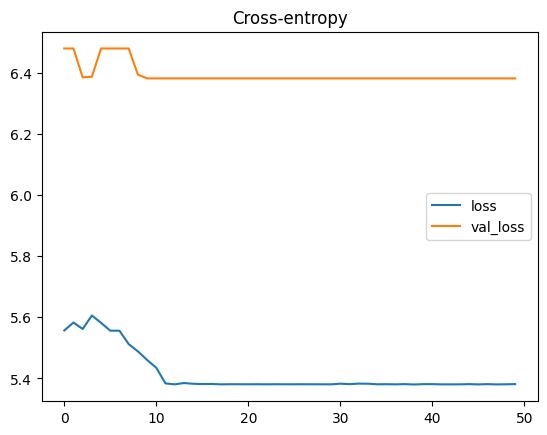

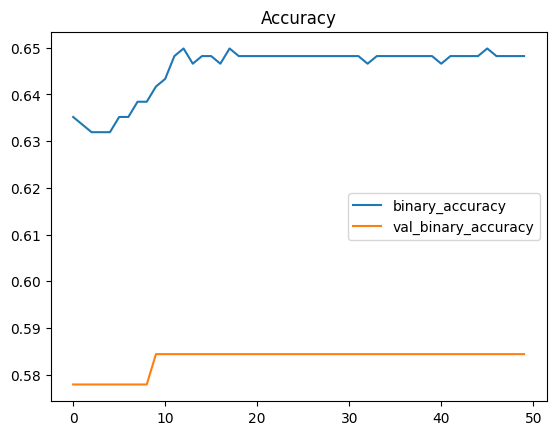

In [13]:
# CONSTRUIR UNA RED NEURONAL SENCILLA DE UNA CAPA

# Define input_shape

df.shape
input_shape = [8]

# Define a binary classification linear model with 1 layer

model = keras.Sequential([
    layers.Dense(units=1, input_shape = input_shape)
])


# Compile the model

model.compile(
    optimizer = "adam",
    loss= "binary_crossentropy",
    metrics=['binary_accuracy'],
)

# Fit the model

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=64,
    epochs=50,
    verbose=0
)

# Draw the learning curves

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history_df['val_loss'].min(),
              history_df['val_binary_accuracy'].max()))

In [14]:
# Calculate Accuracy in Validation Data

score1 = model.evaluate(X_test, y_test, verbose=1)
model_val_accuracy = score1[1]

5/5 [==============================] - 0s 3ms/step - loss: 6.3818 - binary_accuracy: 0.5844


Best Validation Loss: 0.5939
Best Validation Accuracy: 0.7338


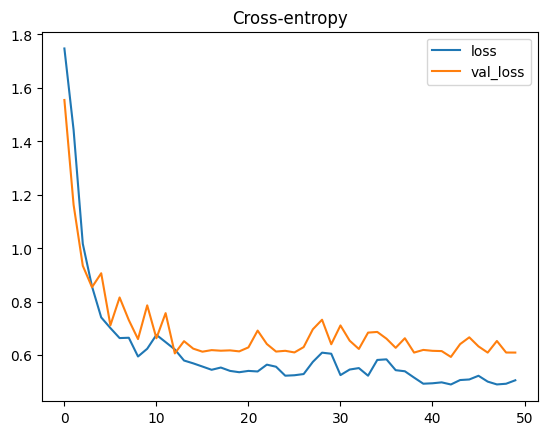

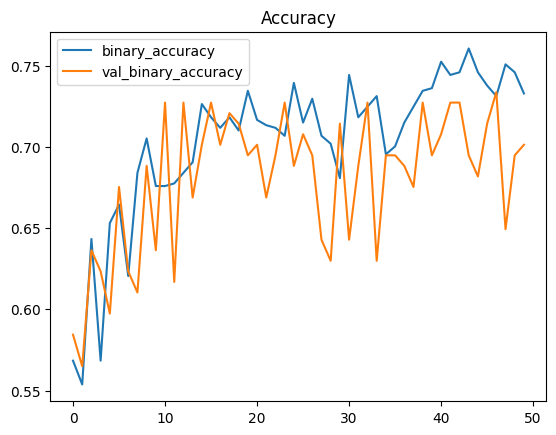

In [12]:
# CONSTRUIR UNA RED NEURONAL SENCILLA DE VARIAS CAPAS

# Define input_shape

# INTRODUCE AQUÍ TU CÓDIGO
input_shape = [8]

# Define a binary classification linear model with several layers

# INTRODUCE AQUÍ TU CÓDIGO

model2 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=input_shape),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation = 'sigmoid')
])


# Compile the model

# INTRODUCE AQUÍ TU CÓDIGO

model2.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

history2 = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=50,
    verbose=0
)

history2_df = pd.DataFrame(history2.history)
history2_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history2_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history2_df['val_loss'].min(),
              history2_df['val_binary_accuracy'].max()))

In [15]:
# Calculate Accuracy in Validation Data

score1 = model2.evaluate(X_test, y_test, verbose=1)
model_val_accuracy = score1[1]


5/5 [==============================] - 0s 4ms/step - loss: 0.6102 - binary_accuracy: 0.7013


Best Validation Loss: 0.5064
Best Validation Accuracy: 0.7532


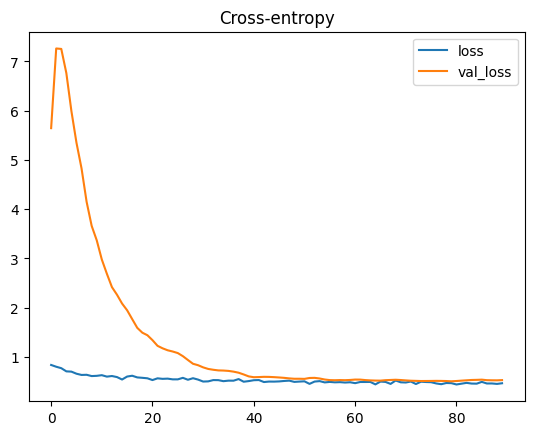

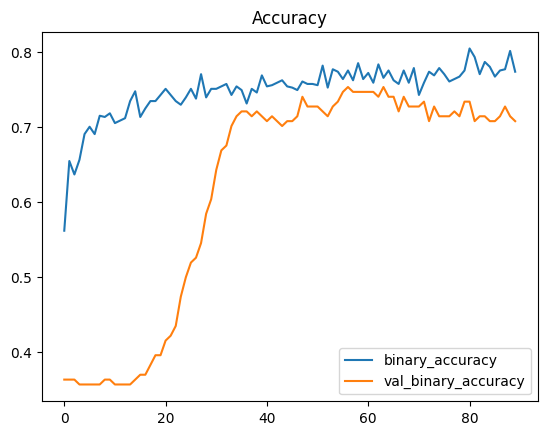

In [11]:
# CONSTRUIR UNA RED NEURONAL SENCILLA DE VARIAS CAPAS CON REGULARIZACIÓN

# Define input_shape

# INTRODUCE AQUÍ TU CÓDIGO
input_shape = [8]

# Define a binary classification linear model with several layers with regularization and dropout

# INTRODUCE AQUÍ TU CÓDIGO

model3 = keras.Sequential([
    layers.Dense(256, activation='relu', input_shape=input_shape),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(128, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid'),
])


# Compile the model

# INTRODUCE AQUÍ TU CÓDIGO

model3.compile(
    optimizer = 'adam',
    loss= 'binary_crossentropy',
    metrics=['binary_accuracy'],
)

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True,
)

history3 = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    batch_size=128,
    epochs=100,
    callbacks=[early_stopping],
    verbose=0,
)

history3_df = pd.DataFrame(history3.history)
history3_df.loc[:, ['loss', 'val_loss']].plot(title="Cross-entropy")
history3_df.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot(title="Accuracy")

print(("Best Validation Loss: {:0.4f}" +\
      "\nBest Validation Accuracy: {:0.4f}")\
      .format(history3_df['val_loss'].min(),
              history3_df['val_binary_accuracy'].max()))

In [27]:
# Calculate Accuracy in Validation Data

score1 = model3.evaluate(X_test, y_test, verbose=1)
model_val_accuracy = score1[1]

5/5 [==============================] - 0s 3ms/step - loss: 0.5064 - binary_accuracy: 0.7338


In [ ]:
# ESCRIBE Y COMPARA TODOS LOS RESULTADOS DE ACCURACY OBTENIDOS POR TODOS LOS MODELOS E INDICA CUAL ES MEJOR

### Modelo sencillo de una capa:
loss: 6.3818 - binary_accuracy: 0.5844

### Modelo de varias capas:
loss: 0.6102 - binary_accuracy: 0.7013

### Modelo de varias capas con regulación:
loss: 0.5064 - binary_accuracy: 0.7338

El modelo de una sola capa da un resultado notablemente peor que los otros dos. Tiene un notable overfitting ya que si nos fijamos en la curva de pérdida de entrenamiento y validación están realmente separadas y además, son paralelas.
Los otros dos modelos tienen muchas menos pérdidas ya que hemos aumentado las capas. Este dataset no es excesivamente grande y por tanto es muy fácil caer en el overfitting. Solo con añadir capas ya mejora, pero el mejor modelo es en el que aplicamos regulaciones. Yo he aplicado BatchNormalization, dropouts y earlystopping para intentar solventar el problema del tamaño del dataset. He utilizado un dropout del 0.4 porque, tras hacer numerosas pruebas, era en el que menos se perdía y mayor precisión tenía. En conclusión, hemos podido ver que el mejor sistema de red neuronal es una de varias capas, adaptadas al tamaño del dataset, en el que añadimos regularizaciones que mejoren la optimización del modelo.

In [29]:
# PARA EL MEJOR MODELO BUSCA UN EJEMPLO QUE FALLE Y TRATA DE EXPLICAR PORQUE FALLA
# Realiza predicciones en el conjunto de prueba
y_pred = model3.predict(X_test)

# Compara las predicciones con las etiquetas reales
misclassified_indices = np.where(y_pred_binary.flatten() != y_test)[0]

# Imprime algunos ejemplos mal clasificados
for index in misclassified_indices[:min(5, len(misclassified_indices))]:
    print(f"Índice: {index}")
    print(f"Valores en el DataFrame:")
    print(X_test.iloc[index])
    print(f"Predicción: {y_pred_binary.flatten()[index]}, Etiqueta real: {y_test.iloc[index]}")
    print("\n" + "="*50 + "\n")

5/5 [==============================] - 0s 5ms/step
Índice: 1
Valores en el DataFrame:
Pregnancies                   3.000
Glucose                     180.000
BloodPressure                64.000
SkinThickness                25.000
Insulin                      70.000
BMI                          34.000
DiabetesPedigreeFunction      0.271
Age                          26.000
Name: 40, dtype: float64
Predicción: 1, Etiqueta real: 0


Índice: 2
Valores en el DataFrame:
Pregnancies                   7.000
Glucose                     114.000
BloodPressure                64.000
SkinThickness                 0.000
Insulin                       0.000
BMI                          27.400
DiabetesPedigreeFunction      0.732
Age                          34.000
Name: 630, dtype: float64
Predicción: 0, Etiqueta real: 1


Índice: 3
Valores en el DataFrame:
Pregnancies                   1.000
Glucose                     125.000
BloodPressure                50.000
SkinThickness                40.000
Insul

En este dataset es complicado intentar encontrar una explicación a los fallos ya que no tengo los conocimientos médicos suficientes para interpretar los datos. Sin embargo, creo que se pueden deber al tamaño del dataset. Si tuviera 50.000 filas de entrenamiento en vez de 600, probablemente tendría mucho menos ruido y podría generalizar mucho mejor.